### Import the necessary variables

In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import math
import seaborn as sns
import impyute as impy

### Jupyter configuration

In [452]:
pd.set_option('display.max_rows', 500)
%matplotlib inline

### Load the dataset for all the countries

In [453]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [454]:
all_countries_dataset = pd.read_csv('all_countries_dataset.csv')

### List all available variables

In [455]:
all_countries_dataset.columns.tolist()

['Unnamed: 0',
 'iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_

In [456]:
all_countries_dataset.head(10)

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


### Fix variables datatypes

In [457]:
# drop cloumn Unnamed: 0

if 'Unnamed: 0' in all_countries_dataset.columns:
    all_countries_dataset = all_countries_dataset.drop(columns=['Unnamed: 0'])

# Fixing date column datatype
all_countries_dataset['date'] = pd.to_datetime(all_countries_dataset['date']);
# all_countries_dataset['location'] = all_countries_dataset['location'].astype('category');
# all_countries_dataset['continent'] = all_countries_dataset['continent'].astype('category');

# all_countries_dataset.set_index('date', inplace=True)

### Exclude unnecessary continents

In [458]:
rule = np.logical_or(all_countries_dataset['continent'] == 'Europe', all_countries_dataset['location'] == 'United States')
dataset = all_countries_dataset[rule]

### Select only the relevant variables that can be used

In report will be needed to be explained why we excluded those variables

In [459]:
variables = [
 'continent',
 'location',
 'date',
 'new_cases',
 'new_deaths',
 'icu_patients',
 'new_tests',
 'positive_rate',
 'people_vaccinated',
 'new_vaccinations',
 'total_boosters',
 'stringency_index',
 'population',
 'population_density',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'human_development_index'
 ]

Exclude the unnecessary variables

In [460]:
dataset = dataset[variables]

### Detect the microcountrie (countries that have a population of less than 500 000)

In [461]:
countries = dataset['location'].unique()

population_threshold = 500000
micro_countries = []

for country in countries:
    country_population = dataset[dataset['location'] == country]['population'].max()
    if country_population < population_threshold:
        micro_countries.append(country)

print(len(micro_countries))
micro_countries

11


['Andorra',
 'Faeroe Islands',
 'Gibraltar',
 'Guernsey',
 'Iceland',
 'Isle of Man',
 'Jersey',
 'Liechtenstein',
 'Monaco',
 'San Marino',
 'Vatican']

### Exclude the microcountries

In [462]:
# exclude the micro countries
dataset = dataset[~dataset['location'].isin(micro_countries)]

### Feature scaling

In [463]:
# Perform feature scaling

# take only numerical variables
# numerical_variables = [
#     'new_cases',
#     'new_deaths',
#     'reproduction_rate',
#     'icu_patients',
#     'hosp_patients',
#     'new_tests',
#     'positive_rate',
#     'people_vaccinated',
#     'new_vaccinations',
#     'total_boosters',
#     'stringency_index',
#     'population',
#     'population_density',
#     'cardiovasc_death_rate',
#     'diabetes_prevalence',
#     'human_development_index'
# ]

# # take non-numerical variables
# non_numerical_variables = [
#     'continent',
#     'location',
#     'date'
# ]

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# obj_dataset = dataset[non_numerical_variables].copy()
# num_dataset = dataset[numerical_variables].copy()
# num_dataset_scaled = sc.fit_transform(num_dataset)
# dataset = pd.concat([obj_dataset, pd.DataFrame(data=num_dataset_scaled, columns=numerical_variables)], axis=1)

# dataset.dtypes


### Remove negative values

In [464]:
# removed records where new_cases is negative
# for each numerical variable 
# if new_cases is negative, set it to 0
def remove_negative_values(dataset):
    new_dataset = dataset.copy()
    for variable in variables:
        if variable in ['location', 'continent', 'date']:
            continue
        for index, row in new_dataset.iterrows():
            if index == 0:
                continue
            if row[variable] < 0 and index in new_dataset.index:
                new_dataset.at[index, variable] = new_dataset.at[index - 1, variable]
    return new_dataset

In [465]:
cleaned_dataset = remove_negative_values(dataset)

In [466]:
cleaned_dataset.head(10)

,continent,location,date,new_cases,new_deaths,icu_patients,new_tests,positive_rate,people_vaccinated,new_vaccinations,total_boosters,stringency_index,population,population_density,cardiovasc_death_rate,diabetes_prevalence,human_development_index
617,Europe,Albania,2020-02-25,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795
618,Europe,Albania,2020-02-26,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795
619,Europe,Albania,2020-02-27,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795
620,Europe,Albania,2020-02-28,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795
621,Europe,Albania,2020-02-29,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795
622,Europe,Albania,2020-03-01,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795
623,Europe,Albania,2020-03-02,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795
624,Europe,Albania,2020-03-03,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795
625,Europe,Albania,2020-03-04,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795
626,Europe,Albania,2020-03-05,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,8.33,2872934.0,104.871,304.195,10.08,0.795


### Replace first non missing values

In [467]:
def replace_backwards(new_dataset, index, variable, value_to_replace_with):
    while index in new_dataset.index:
        new_dataset.at[index, variable] = value_to_replace_with
        index -= 1

# replace first missing values with first non missing value
def replace_first_missing_values(dataset):
    new_dataset = dataset.copy()
    
    for variable in ['population', 'population_density', 'cardiovasc_death_rate', 'diabetes_prevalence', 'human_development_index']:
        for index, row in dataset.iterrows():
            if not pd.isna(row[variable]):
                replace_backwards(new_dataset, index, variable, row[variable])
                break
    
    for variable in ['new_vaccinations', 'people_vaccinated', 'total_boosters']:
        for index, row in dataset.iterrows():
            if not pd.isna(row[variable]):
                replace_backwards(new_dataset, index, variable, 0)
                break

    return new_dataset

In [468]:
cleaned_dataset = replace_first_missing_values(cleaned_dataset)

### Replace missing values


In [469]:
def next_non_missing_value(dataset, index, variable):
    next_index = index
    while next_index in dataset.index and pd.isna(dataset.loc[next_index, variable]):
        next_index += 1
    if next_index not in dataset.index:
        return (next_index - 1, -1)
    return (index, dataset.loc[next_index, variable])

def last_non_missing_value(dataset, index, variable):
    last_index = index
    while last_index in dataset.index and pd.isna(dataset.loc[last_index, variable]):
        last_index -= 1
    if last_index not in dataset.index:
        return (last_index + 1, -1)
    return (index, dataset.loc[last_index, variable])

def replace_missing_values(dataset):
    df = dataset.copy()
    new_dataset = pd.DataFrame()
    for country in df['location'].unique():
        country_dataset = df[df['location'] == country]
        for variable in variables:
            if variable in ['location', 'continent', 'date']:
                continue
            found_non_missing = False
            for index, row in country_dataset.iterrows():
                if pd.isna(row[variable]):
                    if found_non_missing and (index - 1) in country_dataset.index and (index + 1) in country_dataset.index:
                        next = next_non_missing_value(country_dataset, index, variable)
                        last = last_non_missing_value(country_dataset, index, variable)
                        if next[1] == -1 or last[1] == -1:
                            continue
                        new_val = (next[1] - last[1]) / 2
                        country_dataset.loc[index, variable] = last[1] + new_val
                else:
                    found_non_missing = True
        new_dataset = pd.concat([new_dataset, country_dataset])
    return new_dataset

In [470]:
cleaned_dataset = replace_missing_values(cleaned_dataset)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Remove anomalies

In [471]:
def split_dataframe(a, n): 
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [472]:
def get_mean(dataset, variable):
    sum = 0
    max = dataset[variable].max()
    if pd.isna(max):
        return 0
    count = 0
    for index, row in dataset.iterrows():
        if (~pd.isna(row[variable]) and row[variable] < max) == True:
            sum = sum + row[variable]
            count = count + 1
    if sum == 0:
        return 0
    return sum / count

In [473]:
def remove_anomalies(dataset):
    new_dataset = pd.DataFrame()
    for country in dataset['location'].unique():
        new_country_data = pd.DataFrame()
        country_data = dataset[dataset['location'] == country]
        dataset_chunks = split_dataframe(country_data, 25)

        for chunk in dataset_chunks:
            for variable in variables:
                if variable in ['location', 'continent', 'date']:
                    continue
                anomaly_indexes = chunk[chunk[variable] > chunk[variable].quantile(0.99)].index
                for index in anomaly_indexes:
                    if index - 1 in chunk.index:
                        chunk.at[index, variable] = chunk.at[index - 1, variable]
            new_country_data = new_country_data.append(chunk)
        
        new_dataset = new_dataset.append(new_country_data)

    return new_dataset

In [474]:
cleaned_dataset = remove_anomalies(cleaned_dataset)

### Show the coverage percentage for hosp_patiens and icu_patients

In [475]:
def show_coverage(dataset, variables):
    for country in dataset['location'].unique():
        for variable in variables:
            count = 0
            country_data = dataset[dataset['location'] == country]
            for index, row in country_data.iterrows():
                if not pd.isna(row[variable]):
                    count = count + 1
            covered = count / country_data.shape[0] * 100
            print("{}, {} = {} %".format(country, variable, covered))
        print("\n")

In [476]:
show_coverage(cleaned_dataset, ['icu_patients'])

Albania, icu_patients = 0.0 %


Austria, icu_patients = 92.85714285714286 %


Belarus, icu_patients = 0.0 %


Belgium, icu_patients = 92.4646781789639 %


Bosnia and Herzegovina, icu_patients = 0.0 %


Bulgaria, icu_patients = 93.87417218543047 %


Croatia, icu_patients = 0.0 %


Cyprus, icu_patients = 98.50993377483444 %


Czechia, icu_patients = 97.57281553398059 %


Denmark, icu_patients = 89.2018779342723 %


Estonia, icu_patients = 95.141065830721 %


Finland, icu_patients = 90.6687402799378 %


France, icu_patients = 98.30246913580247 %


Germany, icu_patients = 90.54263565891473 %


Greece, icu_patients = 0.0 %


Hungary, icu_patients = 0.0 %


Ireland, icu_patients = 94.28104575163398 %


Italy, icu_patients = 95.00780031201248 %


Kosovo, icu_patients = 0.0 %


Latvia, icu_patients = 0.0 %


Lithuania, icu_patients = 0.0 %


Luxembourg, icu_patients = 98.70340356564019 %


Malta, icu_patients = 98.35255354200989 %


Moldova, icu_patients = 0.0 %


Montenegro, icu_patients = 0.

Remove countries that don't have data for icu_patients variable

In [477]:
def remove_countries_without_data(dataset, variables):
    new_dataset = pd.DataFrame()

    for country in dataset['location'].unique():
        for variable in variables:
            count = 0
            country_data = dataset[dataset['location'] == country]
            for index, row in country_data.iterrows():
                if not pd.isna(row[variable]):
                    count = count + 1
            covered = count / country_data.shape[0] * 100
            if covered != 0:
                new_dataset = new_dataset.append(country_data)
    return new_dataset

In [478]:
cleaned_dataset = remove_countries_without_data(cleaned_dataset, ['icu_patients'])

In [479]:
cleaned_dataset['location'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Ireland', 'Italy',
       'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Romania',
       'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'], dtype=object)

In [480]:
cleaned_dataset.corr()

,new_cases,new_deaths,icu_patients,new_tests,positive_rate,people_vaccinated,new_vaccinations,total_boosters,stringency_index,population,population_density,cardiovasc_death_rate,diabetes_prevalence,human_development_index
new_cases,1.000000,0.820677,0.900209,0.815766,0.129381,0.499717,0.490728,0.441331,0.138078,0.681693,-0.090770,-0.077306,0.244940,0.083081
new_deaths,0.820677,1.000000,0.872660,0.731426,0.162336,0.402510,0.540087,0.512688,0.232848,0.724571,-0.099187,-0.074018,0.258373,0.071535
icu_patients,0.900209,0.872660,1.000000,0.806052,0.122777,0.600376,0.532213,0.487204,0.185062,0.848020,-0.109967,-0.087283,0.295673,0.085089
new_tests,0.815766,0.731426,0.806052,1.000000,-0.039072,0.690078,0.705803,0.556710,0.145869,0.784560,-0.086071,-0.165494,0.195498,0.161550
positive_rate,0.129381,0.162336,0.122777,-0.039072,1.000000,-0.067981,-0.058312,0.089620,0.240261,0.019895,-0.088177,0.283651,0.108422,-0.217305
people_vaccinated,0.499717,0.402510,0.600376,0.690078,-0.067981,1.000000,0.590791,0.673678,-0.011384,0.845560,-0.105187,-0.133422,0.285961,0.139127
new_vaccinations,0.490728,0.540087,0.532213,0.705803,-0.058312,0.590791,1.000000,0.319658,0.130647,0.753459,-0.106249,-0.154487,0.255182,0.142347
total_boosters,0.441331,0.512688,0.487204,0.556710,0.089620,0.673678,0.319658,1.000000,-0.048601,0.618741,-0.092905,-0.000012,0.282262,0.040666
stringency_index,0.138078,0.232848,0.185062,0.145869,0.240261,-0.011384,0.130647,-0.048601,1.000000,0.109724,0.019635,-0.138047,0.061515,0.032648
population,0.681693,0.724571,0.848020,0.784560,0.019895,0.845560,0.753459,0.618741,0.109724,1.000000,-0.133020,-0.137692,0.352960,0.143607


### Plots

In [481]:
def plot_vars_per_country(dataset, cleaned_dataset):
    for continent in dataset['continent'].unique():
        print(continent)

        continent_data = dataset[dataset['continent'] == continent]
        continent_data_cleaned = cleaned_dataset[cleaned_dataset['continent'] == continent]

        for variable in variables:
            if variable == 'location' or variable == 'continent' or variable == 'date':
                continue
            continent_countries = continent_data['location'].unique()

            # set fig size
            plt.figure(figsize=(50, 20))

            for country in continent_countries:
                country_data = continent_data[continent_data['location'] == country]
                plt.plot(country_data['date'], country_data[variable], label=country)

            plt.legend()
            plt.title("{} - {}".format(continent, variable))
            plt.show()

            # set fig size
            plt.figure(figsize=(50, 20))

            for country in continent_countries:
                country_data_cleaned = continent_data_cleaned[continent_data_cleaned['location'] == country]
                plt.plot(country_data_cleaned['date'], country_data_cleaned[variable], label=country)

            plt.legend()
            plt.title("{} - {}".format(continent, variable))
            plt.show()


In [482]:
# cleaned_dataset.set_index('date', inplace=True)

In [483]:
# plot_vars_per_country(dataset, cleaned_dataset)

VARMAX

In [484]:
# dataset - diff_dataset
def inverse_differenciate(dataset):
    # for variable in dataset.columns:
    #     if variable == 'location' or variable == 'continent' or variable == 'date':
    #         continue
    #     dataset[variable] = cleaned_dataset[variable].shift(1) + dataset[variable]

    for variable in dataset.columns:
        if variable == 'location' or variable == 'continent' or variable == 'date':
            continue
        dataset[variable] = pd.Series(np.r_[cleaned_dataset[variable], dataset[variable]].cumsum())

    return dataset

In [485]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [784]:
# take only numerical variables
numerical_variables = [
    'new_cases',
    'new_deaths',
    'icu_patients',
    'new_tests',
    'positive_rate',
    'people_vaccinated',
    'new_vaccinations',
    'total_boosters',
    'stringency_index',
    'population',
    'population_density',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'human_development_index'
]

# take non-numerical variables
non_numerical_variables = [
    'continent',
    'location',
    'date'
]

varmax_dataset = cleaned_dataset.copy()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

obj_dataset = varmax_dataset[non_numerical_variables].copy()
num_dataset = varmax_dataset[numerical_variables].copy()
# num_dataset = sc.fit_transform(num_dataset)

num_dataset = pd.DataFrame(num_dataset, columns=numerical_variables)


num_dataset = np.log(num_dataset)

# Take First Difference to Remove Trend
num_dataset = num_dataset.diff()
num_dataset = num_dataset.diff()


# Remove Increasing Volatility
# num_dataset = num_dataset.groupby(num_dataset.index.year).std()

varmax_dataset = pd.concat([obj_dataset, pd.DataFrame(data=num_dataset, columns=numerical_variables)], axis=1)

varmax_dataset.dtypes

continent                          object
location                           object
date                       datetime64[ns]
new_cases                         float64
new_deaths                        float64
icu_patients                      float64
new_tests                         float64
positive_rate                     float64
people_vaccinated                 float64
new_vaccinations                  float64
total_boosters                    float64
stringency_index                  float64
population                        float64
population_density                float64
cardiovasc_death_rate             float64
diabetes_prevalence               float64
human_development_index           float64
dtype: object

### Split into traing and test sets

In [487]:
# split into train and test
training_date_limit = date(2021, 8, 1)

# varmax_dataset.index = pd.to_datetime(varmax_dataset.index)
# varmax_dataset.index.freq = varmax_dataset.index.inferred_freq

varmax_train_dataset = varmax_dataset[varmax_dataset['date'].dt.date < training_date_limit]
varmax_test_dataset = varmax_dataset[varmax_dataset['date'].dt.date >= training_date_limit]

In [488]:
varmax_train_dataset.tail(10)

,continent,location,date,new_cases,new_deaths,icu_patients,new_tests,positive_rate,people_vaccinated,new_vaccinations,total_boosters,stringency_index,population,population_density,cardiovasc_death_rate,diabetes_prevalence,human_development_index
116551,North America,United States,2021-07-22,54798.0,294.0,7687.0,913720.0,0.061,189508053.0,641657.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926
116552,North America,United States,2021-07-23,119189.0,560.0,8097.0,878370.0,0.067,189993342.0,738236.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926
116553,North America,United States,2021-07-24,25062.0,119.0,8419.0,652279.0,0.068,190293647.0,458163.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926
116554,North America,United States,2021-07-25,25399.0,85.0,8867.0,490350.0,0.068,190494395.0,256481.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926
116555,North America,United States,2021-07-26,87023.0,265.0,9448.0,782523.0,0.073,190938533.0,635498.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926
116556,North America,United States,2021-07-27,68488.0,449.0,9994.0,1031672.0,0.076,191415649.0,692605.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926
116557,North America,United States,2021-07-28,69161.0,381.0,10378.0,1100972.0,0.077,191902406.0,710210.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926
116558,North America,United States,2021-07-29,79590.0,327.0,10919.0,1103219.0,0.078,192395568.0,710057.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926
116559,North America,United States,2021-07-30,187905.0,873.0,11463.0,1044901.0,0.087,192964087.0,821704.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926
116560,North America,United States,2021-07-31,31471.0,153.0,12109.0,762691.0,0.087,193307172.0,506864.0,NaN,49.54,332915074.0,35.608,151.089,10.79,0.926


In [785]:
def replace_nans(dataset):
    for variable in dataset.columns:
        for index, row in dataset.iterrows():
            if pd.isna(row[variable]) or row[variable] == float('inf') or row[variable] == float('-inf'):
                previous_timestamp = index - pd.Timedelta(days=1)
                if previous_timestamp in dataset.index and not pd.isna(dataset[previous_timestamp, variable]):
                    dataset.at[index, variable] = dataset.at[previous_timestamp, variable]
                else:
                    dataset.at[index, variable] = 0
    return dataset

In [799]:
import statsmodels.api as sm

exogeneous_variables = [
    'population',
    'population_density',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'human_development_index'
]

endogeneous_variables = [
    'new_cases',
    'new_deaths',
    'icu_patients',
    'new_tests',
    'positive_rate',
    'people_vaccinated',
    'new_vaccinations',
    'total_boosters',
    'stringency_index'
]

varmax_train_dataset = replace_nans(varmax_train_dataset)

without_nans_varmax_dataset = replace_nans(varmax_dataset)

TypeError: unsupported operand type(s) for -: 'int' and 'Timedelta'

### ACF and PACF

https://www.youtube.com/watch?v=CAT0Y66nPhs&ab_channel=DataScienceShow

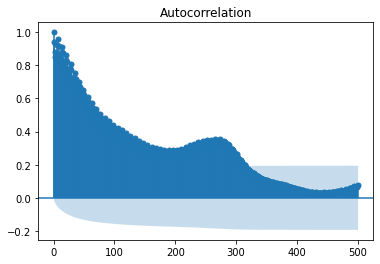

In [ ]:
plot_acf(varmax_train_dataset['new_deaths'], lags=500);

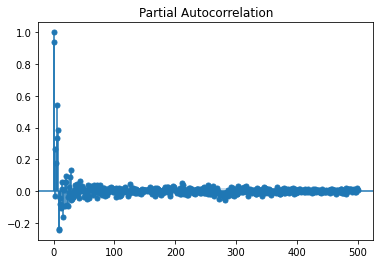

In [ ]:
plot_pacf(varmax_train_dataset['new_deaths'], lags=500);

In [ ]:
mod = sm.tsa.VARMAX(np.asarray(varmax_train_dataset[endogeneous_variables]), np.asarray(varmax_train_dataset[exogeneous_variables]), order=(50, 400))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


In [ ]:
# res = mod.fit(disp=True)
# res.summary()

In [ ]:
# prediction = res.get_prediction()
# prediction_mean = prediction.predicted_mean
# prediction_mean = pd.DataFrame(prediction_mean, columns=endogeneous_variables)

In [ ]:
# plot_vars_per_country(dataset, varmax_dataset)

In [491]:
a = cleaned_dataset.copy()

In [492]:
a.columns.tolist()

['continent',
 'location',
 'date',
 'new_cases',
 'new_deaths',
 'icu_patients',
 'new_tests',
 'positive_rate',
 'people_vaccinated',
 'new_vaccinations',
 'total_boosters',
 'stringency_index',
 'population',
 'population_density',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'human_development_index']

In [567]:
del a["continent"]


KeyError: 'continent'

In [494]:
a.columns.tolist()

['location',
 'date',
 'new_cases',
 'new_deaths',
 'icu_patients',
 'new_tests',
 'positive_rate',
 'people_vaccinated',
 'new_vaccinations',
 'total_boosters',
 'stringency_index',
 'population',
 'population_density',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'human_development_index']

In [495]:
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sb

In [498]:
one_location_dataset = varmax_dataset[varmax_dataset["location"] == "United States"]
one_location_dataset.head()

,continent,location,date,new_cases,new_deaths,icu_patients,new_tests,positive_rate,people_vaccinated,new_vaccinations,total_boosters,stringency_index,population,population_density,cardiovasc_death_rate,diabetes_prevalence,human_development_index
116004,North America,United States,2020-01-22,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,151.089,10.79,0.926
116005,North America,United States,2020-01-23,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,151.089,10.79,0.926
116006,North America,United States,2020-01-24,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,151.089,10.79,0.926
116007,North America,United States,2020-01-25,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,151.089,10.79,0.926
116008,North America,United States,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,151.089,10.79,0.926


In [789]:
dataset = varmax_dataset[["date", "location", "new_deaths" ]]
# dataset = varmax_dataset[["date", "new_deaths" ]]

# dataset['location'] = dataset['location'].astype('category')
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date', inplace=True)
# dataset['month'] = [x.month for x in dataset.index]
# dataset['year'] = [x.year for x in dataset.index]
# dataset['day'] = [x.day for x in dataset.index]

dataset.head()



C:\Users\User\AppData\Local\Temp/ipykernel_15636/592945303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = pd.to_datetime(dataset['date'])


,location,new_deaths
date,,
2020-02-25,Austria,NaN
2020-02-26,Austria,NaN
2020-02-27,Austria,NaN
2020-02-28,Austria,NaN
2020-02-29,Austria,NaN


In [586]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	print(agg)
	return agg.values

In [590]:
add = series_to_supervised(dataset,n_in= 6)
add

            new_deaths  new_deaths  new_deaths  new_deaths  new_deaths  \
date                                                                     
2020-03-02         0.0         0.0         0.0         0.0         0.0   
2020-03-03         0.0         0.0         0.0         0.0         0.0   
2020-03-04         0.0         0.0         0.0         0.0         0.0   
2020-03-05         0.0         0.0         0.0         0.0         0.0   
2020-03-06         0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
2021-10-28      1831.0       438.0       152.0      1403.0      1539.0   
2021-10-29       438.0       152.0      1403.0      1539.0      2492.0   
2021-10-30       152.0      1403.0      1539.0      2492.0      1776.0   
2021-10-31      1403.0      1539.0      2492.0      1776.0      1656.0   
2021-11-01      1539.0      2492.0      1776.0      1656.0       291.0   

            new_deaths  new_deaths  


array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [ 152., 1403., 1539., ..., 1776., 1656.,  291.],
       [1403., 1539., 2492., ..., 1656.,  291.,  164.],
       [1539., 2492., 1776., ...,  291.,  164., 1201.]])

In [591]:
 
from sklearn.metrics import mean_absolute_error

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

In [592]:
mae, y, yhat = walk_forward_validation(add, 12)


>expected=1921.0, predicted=2582.3
>expected=1831.0, predicted=1234.2
>expected=438.0, predicted=632.2
>expected=152.0, predicted=517.5


KeyboardInterrupt: 

MAE: 447.966


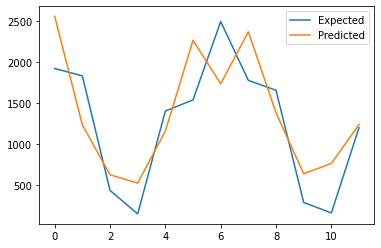

In [540]:
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
row = values[-6:].flatten()


<!-- ======================================================================================================================= -->

In [790]:
df_list = [d for _, d in dataset.groupby(['location'])]
for x in range(24):
    df_list[x]['ag_l1'] = df_list[x]['new_deaths'].shift(1)
    df_list[x]['ag_l2'] = df_list[x]['new_deaths'].shift(2)
    df_list[x]['ag_l3'] = df_list[x]['new_deaths'].shift(3)
    df_list[x]['ag_l4'] = df_list[x]['new_deaths'].shift(4)
    df_list[x]['ag_l5'] = df_list[x]['new_deaths'].shift(5)
    # df_list[x] = df_list[x].dropna()
    df_list[x] = df_list[x].drop
data = pd.concat(df_list)
data


,location,new_deaths,ag_l1,ag_l2,ag_l3,ag_l4,ag_l5
date,,,,,,,
2020-03-22,Austria,-inf,inf,-inf,-inf,inf,-inf
2020-03-23,Austria,-1.856298,-inf,inf,-inf,-inf,inf
2020-03-24,Austria,0.806476,-1.856298,-inf,inf,-inf,-inf
2020-03-25,Austria,-1.589235,0.806476,-1.856298,-inf,inf,-inf
2020-03-26,Austria,3.504055,-1.589235,0.806476,-1.856298,-inf,inf
...,...,...,...,...,...,...,...
2021-10-28,United States,-0.820675,0.389433,-2.129968,3.280826,0.372060,-1.382415
2021-10-29,United States,0.268763,-0.820675,0.389433,-2.129968,3.280826,0.372060
2021-10-30,United States,-1.668878,0.268763,-0.820675,0.389433,-2.129968,3.280826


In [791]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score



date
2020-02-25    0.000000
2020-02-26    0.000000
2020-02-27    0.000000
2020-02-28    0.000000
2020-02-29    0.000000
                ...   
2021-10-28   -0.820675
2021-10-29    0.268763
2021-10-30   -1.668878
2021-10-31    1.165380
2021-11-01    2.564500
Name: new_deaths, Length: 15061, dtype: float64

In [795]:
from sklearn.model_selection import train_test_split

x_train = list()
y_train = list()
x_test = list()
y_test = list()
df_list = [d for _, d in data.groupby(['location'])]

for x in range(24):
    X = df_list[x][['location', 'ag_l1', 'ag_l2', 'ag_l3','ag_l4', 'ag_l5']]
    y = df_list[x]['new_deaths']
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=0, shuffle=False)
    x_train.append(xtrain)
    x_test.append(xtest)
    y_train.append(ytrain)
    y_test.append(ytest)
x_train_merged = pd.concat(x_train)
x_test_merged = pd.concat(x_test)
y_train_merged = pd.concat(y_train)
y_test_merged = pd.concat(y_test)
new_x_train_merged = x_train_merged[[ 'ag_l1',  'ag_l2', 'ag_l3','ag_l4', 'ag_l5' ]]
new_x_test_merged = x_test_merged[[ 'ag_l1',  'ag_l2', 'ag_l3','ag_l4', 'ag_l5' ]]


In [797]:
new_x_train_merged

,ag_l1,ag_l2,ag_l3,ag_l4,ag_l5
date,,,,,
2020-03-22,inf,-inf,-inf,inf,-inf
2020-03-23,-inf,inf,-inf,-inf,inf
2020-03-24,-1.856298,-inf,inf,-inf,-inf
2020-03-25,0.806476,-1.856298,-inf,inf,-inf
2020-03-26,-1.589235,0.806476,-1.856298,-inf,inf
...,...,...,...,...,...
2021-06-29,1.583136,0.395585,-1.633972,0.590652,-0.288191
2021-06-30,0.020817,1.583136,0.395585,-1.633972,0.590652
2021-07-01,-0.929310,0.020817,1.583136,0.395585,-1.633972


In [796]:
my_lm = RandomForestRegressor(n_estimators = 20,  criterion='absolute_error')
my_lm.fit(X = new_x_train_merged, y = y_train_merged)
test_fcst = my_lm.predict(new_x_test_merged)
test_fcst

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [674]:
my_lm.score(new_x_test_merged, y_test_merged)


0.7998082353974084

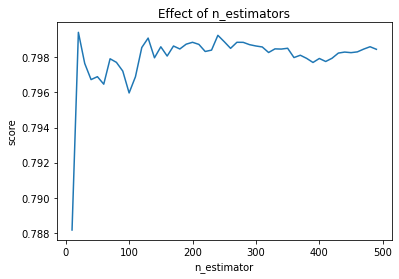

In [655]:
estimators = np.arange(10, 500, 10)
scores = []
for n in estimators:
    my_lm.set_params(n_estimators=n)
    my_lm.fit(X = new_x_train_merged, y = y_train_merged)
    scores.append(my_lm.score(new_x_test_merged, y_test_merged))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

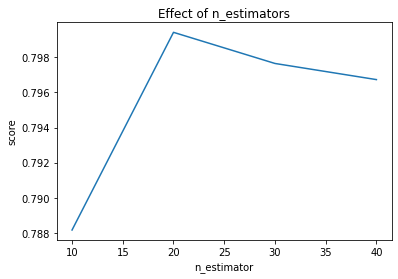

In [654]:
estimators = np.arange(10, 50, 10)
scores = []
for n in estimators:
    my_lm.set_params(n_estimators=n)
    my_lm.fit(X = new_x_train_merged, y = y_train_merged)
    scores.append(my_lm.score(new_x_test_merged, y_test_merged))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [760]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [6,7,8,9,10,11,12,15,19,21,22,23,24,26,30,35,40,45,450,52,67,77,78,79,80]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [6, 7, 8, 9, 10, 11, 12, 15, 19, 21, 22, 23, 24, 26, 30, 35, 40, 45, 450, 52, 67, 77, 78, 79, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [761]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = None, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X = new_x_train_merged, y = y_train_merged)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [6, 7, 8, 9, 10, 11, 12,
                                                         15, 19, 21, 22, 23, 24,
                                                         26, 30, 35, 40, 45,
                                                         450, 52, 67, 77, 78,
                                                         79, 80]},
                   random_state=42)

In [762]:
rf_random.best_params_


{'n_estimators': 450,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [742]:
y_test_merged.fillna(0)

date
2021-07-02       3.0
2021-07-03       0.0
2021-07-04       0.0
2021-07-05       4.0
2021-07-06       5.0
               ...  
2021-10-28    1776.0
2021-10-29    1656.0
2021-10-30     291.0
2021-10-31     164.0
2021-11-01    1201.0
Name: new_deaths, Length: 2997, dtype: float64

In [772]:

base_model = RandomForestRegressor(n_estimators = 9, random_state = 42)
base_model.fit(X = new_x_train_merged, y = y_train_merged)
predictions = base_model.predict(new_x_test_merged)
base_accuracy = base_model.score(new_x_test_merged, y_test_merged)
base_accuracy


0.8060591991434694

In [763]:
best_random = rf_random.best_estimator_
random_accuracy = best_random.score(new_x_test_merged, y_test_merged)
random_accuracy

0.7870123716279074

In [718]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.23%.


Grid Search

In [768]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [9, 100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [769]:
# Fit the grid search to the data
grid_search.fit(new_x_train_merged, y_train_merged)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 9}

In [767]:
best_grid = grid_search.best_estimator_
grid_accuracy = best_random.score(new_x_test_merged, y_test_merged)
grid_accuracy

0.7870123716279074

In [780]:
y_test_merged.view()
new_index = y_test_merged.index

In [783]:
s = pd.Series(test_fcst)
s.index = new_index
s.size

2997

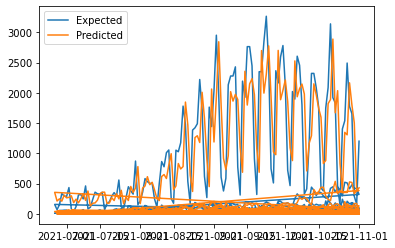

In [782]:
# plot expected vs predicted

pyplot.plot(y_test_merged, label='Expected')
pyplot.plot(s, label='Predicted')
pyplot.legend()
pyplot.show()

In [615]:
# Calculate the absolute errors
errors = abs(test_fcst - y_test_merged)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 28.15


In [611]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs(test_fcst - y_test_merged) / y_test_merged)
test_fcst
# Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')



array([4.5000e+00, 2.4000e+00, 1.1000e+00, ..., 1.4787e+03, 4.3950e+02,
       4.0830e+02])

In [617]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(varmax_train_dataset[["new_cases"]], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

MissingDataError: exog contains inf or nans

In [ ]:
varmax_test_dataset = replace_nans(varmax_test_dataset)
y_predict = my_lm.predict(varmax_train_dataset[numerical_variables])
score = my_lm.score(varmax_test_dataset[numerical_variables], y_predict  )
score


ValueError: Found input variables with inconsistent numbers of samples: [12829, 2232]

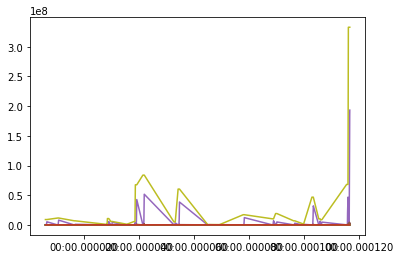

In [ ]:
from matplotlib import pyplot
pyplot.plot(varmax_train_dataset[numerical_variables], label = "Expected")
pyplot.plot(varmax_train_dataset[["new_deaths"]], label = "Predicted")
pyplot.show()